# **Exploratory Data Analysis (EDA) - Etablissements** #

In [1]:
import pandas as pd
import numpy as np


## **ETABLISSEMENTS** ##

CODGEO : ID géographique de la ville  
LIBGEO : nom de la ville  
REG : numéro de région  
DEP : numéro de département  
E14TST : nombre total d'entreprises dans la ville  
E14TS0ND : nombre d'entreprises de taille inconnue ou nulle dans la ville  
E14TS1 : nombre d'entreprises de 1 à 5 employés dans la ville  
E14TS6 : nombre d'entreprises de 6 à 9 employés dans la ville  
E14TS10 : nombre d'entreprises de 10 à 19 employés dans la ville  
E14TS20 : nombre d'entreprises de 20 à 49 employés dans la ville  
E14TS50 : nombre d'entreprises de 50 à 99 employés dans la ville  
E14TS100 :  nombre d'entreprises de 100 à 199 employés dans la ville  
E14TS200 : nombre d'entreprises de 200 à 499 employés dans la ville  
E14TS500 : nombre d'entreprises de plus de 500 employés dans la ville  

### Création du dataframe ets ###

In [2]:
ets = pd.read_csv('./data/base_etablissement_par_tranche_effectif.csv')
ets.head()

,CODGEO,LIBGEO,REG,DEP,E14TST,E14TS0ND,E14TS1,E14TS6,E14TS10,E14TS20,E14TS50,E14TS100,E14TS200,E14TS500
0,01001,L'Abergement-Clémenciat,82,01,25,22,1,2,0,0,0,0,0,0
1,01002,L'Abergement-de-Varey,82,01,10,9,1,0,0,0,0,0,0,0
2,01004,Ambérieu-en-Bugey,82,01,996,577,272,63,46,24,9,3,2,0
3,01005,Ambérieux-en-Dombes,82,01,99,73,20,3,1,2,0,0,0,0
4,01006,Ambléon,82,01,4,4,0,0,0,0,0,0,0,0


### Combien de lignes ? ###

In [3]:
#Combien de lignes?
print('Nombre de lignes : {}'.format(len(ets)))

Nombre de lignes : 36681


### Des doublons ? ###

In [4]:
#Doublons?
ets.duplicated().value_counts()

False    36681
dtype: int64

### Création d'un dataframe ets_numbers pour exploration des valeurs numériques ###

In [5]:
ets_numbers = ets.select_dtypes(include='number')

#CODGEO, LIBGEO et DEP ne sont pas des colonnes à variables numériques
ets_numbers.head()

,REG,E14TST,E14TS0ND,E14TS1,E14TS6,E14TS10,E14TS20,E14TS50,E14TS100,E14TS200,E14TS500
0,82,25,22,1,2,0,0,0,0,0,0
1,82,10,9,1,0,0,0,0,0,0,0
2,82,996,577,272,63,46,24,9,3,2,0
3,82,99,73,20,3,1,2,0,0,0,0
4,82,4,4,0,0,0,0,0,0,0,0


In [6]:
#Toutes les colonnes numériques sont des integers
ets_numbers.dtypes

REG         int64
E14TST      int64
E14TS0ND    int64
E14TS1      int64
E14TS6      int64
E14TS10     int64
E14TS20     int64
E14TS50     int64
E14TS100    int64
E14TS200    int64
E14TS500    int64
dtype: object

In [7]:
#Des NaN dans ces colonnes numériques ? NON
ets_numbers.isna().sum()

REG         0
E14TST      0
E14TS0ND    0
E14TS1      0
E14TS6      0
E14TS10     0
E14TS20     0
E14TS50     0
E14TS100    0
E14TS200    0
E14TS500    0
dtype: int64

In [8]:
#pour les colonnes avec le nombre d'établissements, est-ce que les min et max sont cohérents?
for i in ets_numbers.columns[1:]:
  print('Colonne {} : min = {} / max = {}'.format(i, ets_numbers[i].min(), ets_numbers[i].max()))

Colonne E14TST : min = 0 / max = 427385
Colonne E14TS0ND : min = 0 / max = 316603
Colonne E14TS1 : min = 0 / max = 76368
Colonne E14TS6 : min = 0 / max = 14836
Colonne E14TS10 : min = 0 / max = 10829
Colonne E14TS20 : min = 0 / max = 5643
Colonne E14TS50 : min = 0 / max = 1658
Colonne E14TS100 : min = 0 / max = 812
Colonne E14TS200 : min = 0 / max = 456
Colonne E14TS500 : min = 0 / max = 180


In [9]:
#Quel est le poids de E14TS0ND (nombre d'entreprises de taille inconnue ou nulle dans la ville) dans le dataset?

#Nombre d'entreprises de taille inconnue ou nulle
E14TS0ND = ets.E14TS0ND.sum()
print('Nombre d\'entreprises de taille inconnue ou nulle : {}'.format(E14TS0ND))

ets_taille_connue = ets_numbers.drop(['REG', 'E14TS0ND', 'E14TST'], axis=1)

total_ets_avec_taille = 0
for i in ets_taille_connue.columns:
  total_ets_avec_taille += ets_taille_connue[i].sum()

print('Nombre d\'entreprises avec taille connue : {}'.format(total_ets_avec_taille))
print('Proportion d\'entreprises avec taille inconnue ou nulle : {}%'.format(np.round(E14TS0ND / (E14TS0ND + total_ets_avec_taille) * 100),1))
print('Nombre total d\'entreprises : {}'.format(E14TS0ND + total_ets_avec_taille))

Nombre d'entreprises de taille inconnue ou nulle : 3064892
Nombre d'entreprises avec taille connue : 1463600
Proportion d'entreprises avec taille inconnue ou nulle : 68.0%
Nombre total d'entreprises : 4528492


### Colonne REG (Régions) : Combien de valeurs uniques ? #

In [10]:
# Combien de valeurs uniques dans REG ?
print(len(np.unique(ets_numbers.REG)))

27


In [11]:
ets_numbers.REG.value_counts(dropna=False)

73    3020
82    2874
41    2338
72    2296
22    2291
26    2046
21    1953
24    1841
25    1812
43    1785
91    1545
31    1545
52    1496
54    1460
23    1420
83    1310
11    1281
53    1270
93     958
42     904
74     747
94     360
2       34
1       32
4       24
3       22
6       17
Name: REG, dtype: int64

### Colonne DEP : Des valeurs non numériques ? Le 0 des 9 premiers DEP conservé ? Combien de DEP ?

In [12]:
#Quelles sont les valeurs non numériques dans DEP ?
DEP_no_numbers = []

for i in ets.DEP:
  try:
    int(i)
  except:
    DEP_no_numbers.append(i)

#Départements de la Corse
print(np.unique(DEP_no_numbers))

['2A' '2B']


In [13]:
#Est-ce que les 0 sont bien présents dans les DPT 01,02,etc.? --> OUI
ets[ets.DEP.isin(['01','02','03','04','05','06','07','08','09','10'])].DEP.value_counts(dropna=False).sort_index()

01    419
02    816
03    320
04    200
05    172
06    163
07    339
08    463
09    332
10    433
Name: DEP, dtype: int64

In [14]:
#Combien de départements ?
print(len(np.unique(ets.DEP)))

101


### Création d'un dataframe pour l'exploration des objets (DEP excl.) ###

In [15]:
#Vérification des valeurs 'string' dans CODGEO et LIBGEO
#Création d'un dataframe pour ces deux colonnes
ets_string = ets.select_dtypes(include='object').drop(['DEP'], axis=1)
ets_string.head()

,CODGEO,LIBGEO
0,01001,L'Abergement-Clémenciat
1,01002,L'Abergement-de-Varey
2,01004,Ambérieu-en-Bugey
3,01005,Ambérieux-en-Dombes
4,01006,Ambléon


In [16]:
ets_string.CODGEO.value_counts(dropna=False)

01001    1
61076    1
61070    1
61071    1
61072    1
        ..
31358    1
31357    1
31356    1
31355    1
97617    1
Name: CODGEO, Length: 36681, dtype: int64

In [17]:
#est-ce qu'il y a des NaN ?
ets_string.isna().sum()

CODGEO    0
LIBGEO    0
dtype: int64

In [18]:
#Est-ce que chaque CODGEO est unique ?
print(len(np.unique(ets_string.CODGEO)) == len(ets_string))

True


In [19]:
#Dans LIBGEO ?
print(len(np.unique(ets_string.LIBGEO)) == len(ets_string))

False


In [20]:
print(len(np.unique(ets_string.LIBGEO)))

34142


### Colonne LIBGEO : Des valeurs non uniques ? ###

In [21]:
#Certains libellés LIBGEO sont identiques. Lesquels ?
count_libgeo = pd.DataFrame(ets_string.groupby(['LIBGEO']).size().reset_index().rename(columns={0: "count"})).sort_values(by='count', ascending=False)
count_libgeo.head(5)                         

,LIBGEO,count
28434,Sainte-Colombe,14
27969,Saint-Sauveur,12
2403,Beaulieu,11
28561,Sainte-Marie,11
15883,Le Pin,10


In [22]:
#Exemple de la diversité des CODGEO pour Sainte-Colombe
ets_string[ets_string['LIBGEO'] == 'Sainte-Colombe']

,CODGEO,LIBGEO
1879,05135,Sainte-Colombe
5779,16309,Sainte-Colombe
6198,17319,Sainte-Colombe
7472,21544,Sainte-Colombe
9311,25515,Sainte-Colombe
13301,33390,Sainte-Colombe
14059,35262,Sainte-Colombe
16007,40252,Sainte-Colombe
17782,46260,Sainte-Colombe
19147,50457,Sainte-Colombe


In [23]:
#est-ce qu'il y des caractère spéciaux?

spec_car = ['!', '?', "/", ',', ';']
spec_car_return = []
for i in ets_string.LIBGEO:
    for j in spec_car:
        if j in i:
            spec_car_return.append(j)

print(np.unique(spec_car_return))

[]


# Exploration Visuelle #

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
from bokeh.plotting import figure, show, output_notebook
output_notebook()

Loading BokehJS ...

## Questions ##

- Quelle est la distribution du nombre d'entreprise ?
    - par région
    - par département

- Quelles sont les tailles d'entreprises les plus communes ?

### Distribution du nombre d'entreprise par région ###

In [25]:
reg_total_ets = ets.groupby('REG', as_index=False).agg(Total_ets = ('E14TST', 'sum')).sort_values(by='Total_ets', ascending=False)
reg_total_ets.head()

,REG,Total_ets
5,11,1048252
22,82,464837
25,93,462972
19,72,242590
24,91,218718


In [26]:
len(reg_total_ets)

27

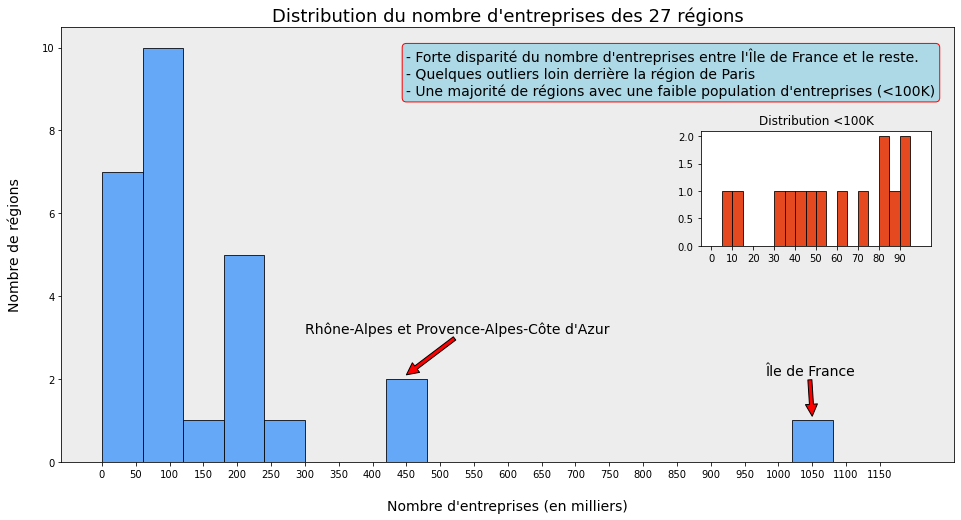

In [27]:
#Instanciation de la figure et de l'axe
fig = plt.figure(figsize=(16,8))
ax = plt.subplot(111)

#Création de l'histogramme principal
ax.hist(reg_total_ets.Total_ets, range=(0,1200000),bins=20, edgecolor='black', linewidth=0.8, color='#64A8F7')

#Configuration des axes et du titre
ax.set_ylabel('Nombre de régions', labelpad=20, fontsize=14)
ax.set_xlabel('Nombre d\'entreprises (en milliers)', labelpad=20, fontsize=14)
ax.set_title('Distribution du nombre d\'entreprises des 27 régions', fontsize=18)

#Ajout d'annotations et format des annotations
t = ax.annotate(text='Île de France', xy=(1050000, 1.1), xytext=(980000,2.1), arrowprops={'facecolor':'red'}), ax.annotate(text='Rhône-Alpes et Provence-Alpes-Côte d\'Azur', xy=(450000,2.1), xytext=(300000,3.1), arrowprops={'facecolor':'red'})
t2 = ax.text(s='- Forte disparité du nombre d\'entreprises entre l\'Île de France et le reste. \n- Quelques outliers loin derrière la région de Paris \n- Une majorité de régions avec une faible population d\'entreprises (<100K)', x=450000, y=10, ha="left", va="top", size=14, bbox=dict(boxstyle="round,pad=0.3",fc="lightblue", ec="red", lw=1))
plt.setp(t, fontsize=14)
plt.setp(t2, fontsize=14)

#Configuration de l'apparence générale du graphique
ax.grid(visible=False)
ax.set_facecolor('#ededed')

#Configuration des abscisses
x= np.arange(0,1200000,50000)
ax.set_xticks(x)
labels = [int(i / 1000) for i in x]
ax.set_xticklabels(labels = labels)

#Ajout d'un mini histogramme
ax2 = plt.axes([0.68, 0.50, 0.2, 0.2])
ax2.hist(reg_total_ets.Total_ets, range=(0,100000), bins=20, edgecolor='black', linewidth=0.8, color='#E5491F')
ax2.set_title('Distribution <100K')

#Configuration des abscisses du mini histogramme
x2 = np.arange(0,100000,10000)
labels2 = [int(i / 1000) for i in x2]
ax2.set_xticks(x2)
ax2.set_xticklabels(labels=labels2)

plt.show()




### Distribution du nombre d'entreprise par département ###

In [28]:
dep_total_ets = ets.groupby('DEP', as_index=False).agg(Total_ets = ('E14TST', 'sum')).sort_values(by='Total_ets', ascending=False)
dep_total_ets.head()

,DEP,Total_ets
75,75,427385
12,13,164883
69,69,136867
92,92,131528
59,59,129819


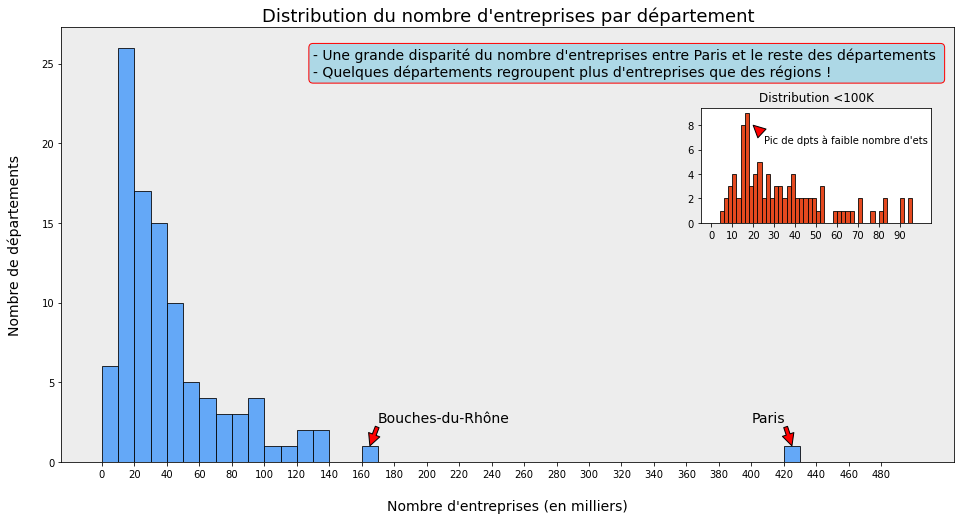

In [29]:
#Instanciation de la figure et de l'axe
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(111)

#Création de l'histogramme principal
ax.hist(dep_total_ets.Total_ets, range=(0,500000), bins=50, edgecolor='black', linewidth=0.8, color='#64A8F7')

#Configuration des axes et du titre
ax.set_ylabel('Nombre de départements', labelpad=20, fontsize=14)
ax.set_xlabel('Nombre d\'entreprises (en milliers)', labelpad=20, fontsize=14)
ax.set_title('Distribution du nombre d\'entreprises par département', fontsize=18)

#Ajout d'annotations et format des annotations
t = ax.annotate('Paris', xy=(425000, 1), xytext=(400000, 2.5), arrowprops={'facecolor': 'red'}), ax.annotate('Bouches-du-Rhône', xy=(165000, 1), xytext=(170000, 2.5), arrowprops={'facecolor': 'red'})
t2 = ax.text(s='- Une grande disparité du nombre d\'entreprises entre Paris et le reste des départements \n- Quelques départements regroupent plus d\'entreprises que des régions ! ' , x=130000, y=26, ha="left", va="top", size=14, bbox=dict(boxstyle="round,pad=0.3",fc="lightblue", ec="red", lw=1))
plt.setp(t, fontsize=14)
plt.setp(t2, fontsize=14)

#Configuration de l'apparence générale du graphique
ax.grid(visible=False)
ax.set_facecolor('#ededed')

#Configuration des abscisses
x = np.arange(0,500000,20000)
labels = [int(i / 1000) for i in x]
ax.set_xticks(x)
ax.set_xticklabels(rotation = 0, labels=labels)


#Ajout d'un mini histogramme
ax2 = plt.axes([0.68, 0.54, 0.2, 0.2])
ax2.hist(dep_total_ets.Total_ets, range=(0,100000), bins=50, edgecolor='black', linewidth=0.8, color='#E5491F')
ax2.set_title('Distribution <100K')

#Configuration des abscisses du mini histogramme
x2 = np.arange(0,100000,10000)
labels2 = [int(i / 1000) for i in x2]
ax2.set_xticks(x2)
ax2.set_xticklabels(labels=labels2)

#Ajout d'annotations dans le mini histogramme
t3 = ax2.annotate('Pic de dpts à faible nombre d\'ets', xy=(20000, 8), xytext=(25000, 6.5), arrowprops={'facecolor': 'red'})

plt.show()


### Taille des entreprises en France par ville ###

La région Île de France étant très nettement à part, nous l'isolons pour l'analyse en boîtes à moustache

In [30]:
ets_paris_in = ets[ets['REG'] == 11].reset_index(drop=True)
ets_paris_out = ets[ets['REG'] != 11].reset_index(drop=True)

On catégorise ensuite le dataset en quartiles pour le nombre total d'entreprises par commune

In [31]:

ets_paris_in['groupes_ets'] = pd.qcut(ets_paris_out.E14TST, q=[0.0,0.25,0.5,0.75,1.0], labels=['0 à 8 ets', '8 à 18 ets', '18 à 51 ets', 'plus de 51'])

ets_paris_out['groupes_ets'] = pd.qcut(ets_paris_out.E14TST, q=[0.0,0.25,0.5,0.75,1.0], labels=['0 à 8 ets', '8 à 18 ets', '18 à 51 ets', 'plus de 51'])



In [32]:
ets_paris_out['groupes_ets'].value_counts()

0 à 8 ets      9740
plus de 51     8755
18 à 51 ets    8579
8 à 18 ets     8326
Name: groupes_ets, dtype: int64

In [33]:
ets_paris_in['groupes_ets'].value_counts()

0 à 8 ets      477
8 à 18 ets     299
18 à 51 ets    276
plus de 51     229
Name: groupes_ets, dtype: int64

In [34]:
ets_paris_out.groupby('groupes_ets', as_index=False).agg(moyenne = ('E14TST', 'mean'), mediane = ('E14TST', 'median'), nombre = ('E14TST', 'count'))

,groupes_ets,moyenne,mediane,nombre
0,0 à 8 ets,4.512320,5.0,9740
1,8 à 18 ets,12.951477,13.0,8326
2,18 à 51 ets,30.853829,29.0,8579
3,plus de 51,349.944146,122.0,8755


In [35]:
ets_paris_in.groupby('groupes_ets', as_index=False).agg(moyenne = ('E14TST', 'mean'), mediane = ('E14TST', 'median'), nombre = ('E14TST', 'count'))

,groupes_ets,moyenne,mediane,nombre
0,0 à 8 ets,618.966457,108.0,477
1,8 à 18 ets,579.792642,80.0,299
2,18 à 51 ets,1851.739130,58.5,276
3,plus de 51,299.419214,55.0,229


In [36]:
#Renome les colonnes des tailles
ets_paris_out.columns = [
 'CODGEO',
 'LIBGEO',
 'REG',
 'DEP',
 'Total ets',
 '0/NA',
 '1 à 5',
 '6 à 9',
 '10 à 19',
 '20 à 49',
 '50 à 99',
 '100 à 199',
 '200 à 499',
 '500 et +',
'groupes_ets'
]

ets_paris_in.columns = [
 'CODGEO',
 'LIBGEO',
 'REG',
 'DEP',
 'Total ets',
 '0/NA',
 '1 à 5',
 '6 à 9',
 '10 à 19',
 '20 à 49',
 '50 à 99',
 '100 à 199',
 '200 à 499',
 '500 et +',
'groupes_ets'
]


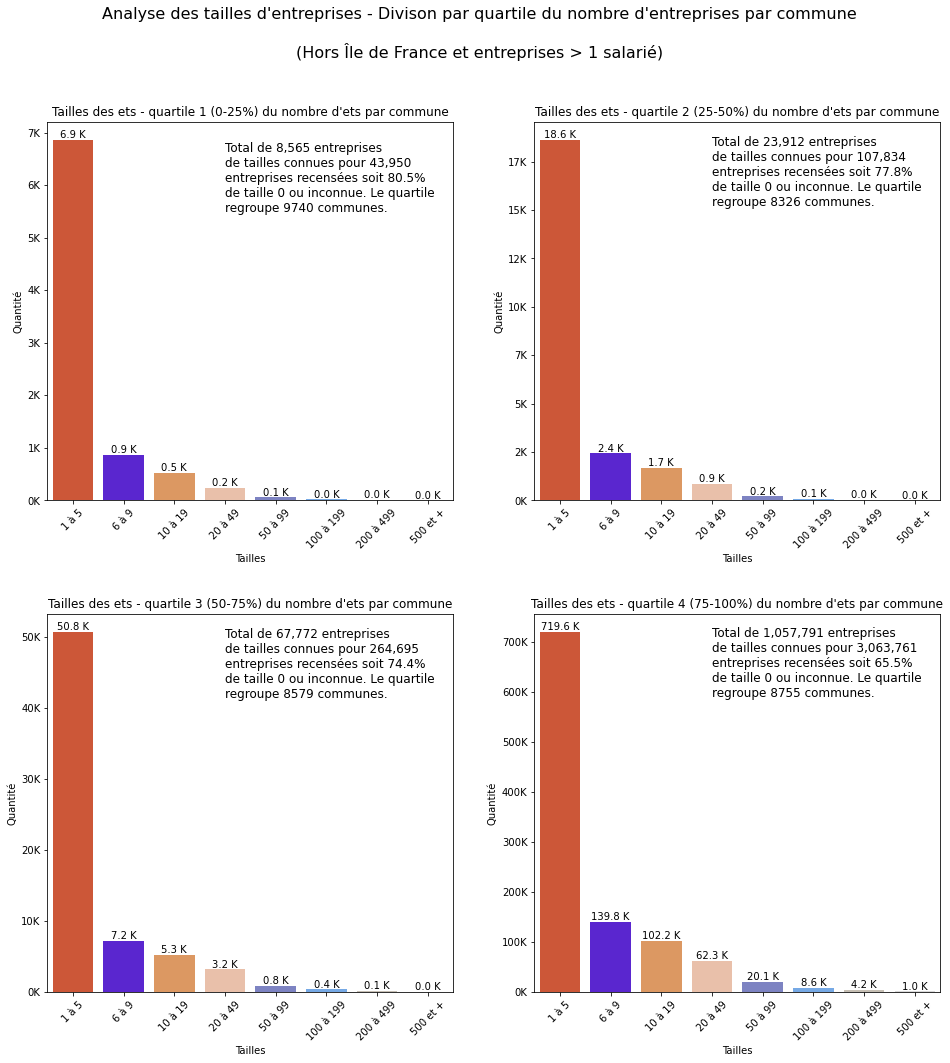

In [37]:
#Division du dataset (excl. Paris) en 4 datasets par quartile
quartile1 = ets_paris_out[ets_paris_out['groupes_ets'] == '0 à 8 ets'].reset_index(drop=True)
quartile2 = ets_paris_out[ets_paris_out['groupes_ets'] == '8 à 18 ets'].reset_index(drop=True)
quartile3 = ets_paris_out[ets_paris_out['groupes_ets'] == '18 à 51 ets'].reset_index(drop=True)
quartile4 = ets_paris_out[ets_paris_out['groupes_ets'] == 'plus de 51'].reset_index(drop=True)

q1_melt = pd.melt(frame=quartile1, 
                id_vars=['CODGEO','LIBGEO','REG','DEP'], 
                value_vars=['1 à 5', '6 à 9', '10 à 19', '20 à 49', '50 à 99', '100 à 199', '200 à 499', '500 et +'])

q2_melt = pd.melt(frame=quartile2, 
                id_vars=['CODGEO','LIBGEO','REG','DEP'], 
                value_vars=['1 à 5', '6 à 9', '10 à 19', '20 à 49', '50 à 99', '100 à 199', '200 à 499', '500 et +'])

q3_melt = pd.melt(frame=quartile3, 
                id_vars=['CODGEO','LIBGEO','REG','DEP'], 
                value_vars=['1 à 5', '6 à 9', '10 à 19', '20 à 49', '50 à 99', '100 à 199', '200 à 499', '500 et +'])


q4_melt = pd.melt(frame=quartile4, 
                id_vars=['CODGEO','LIBGEO','REG','DEP'], 
                value_vars=['1 à 5', '6 à 9', '10 à 19', '20 à 49', '50 à 99', '100 à 199', '200 à 499', '500 et +'])



fig, ax = plt.subplots(2,2, figsize=(16,16))
fig.suptitle("""Analyse des tailles d\'entreprises - Divison par quartile du nombre d'entreprises par commune
             \n(Hors Île de France et entreprises > 1 salarié)""", fontsize=16)

plt.subplots_adjust(hspace=0.3)

labels = q4_melt.variable.unique()
x = range(0, len(labels))

colors = ['#E5491F', '#4F0AEB', '#F0954E', '#F3BDA0', '#717ACE', '#64A8F7', '#C9C0B1', '#D9D9D9']
sns.set_palette(sns.color_palette(colors))

plt.subplot(221)
ax1 = sns.barplot(data=q1_melt, x='variable', y='value', estimator=sum, ci=None)
container_ax1 = ax1.containers[0]
container_labels = ["{:,.1f} K".format(i / 1000) for i in container_ax1.datavalues]
ax1.bar_label(container_ax1, labels=container_labels)
ax1.set_title('Tailles des ets - quartile 1 (0-25%) du nombre d\'ets par commune')
ax1.set_xlabel('Tailles')
ax1.set_ylabel('Quantité')
ax1.set_xticks(x)
ax1.set_xticklabels(labels= labels, rotation=45)
ax1.yaxis.set_major_formatter(lambda x, pos: str(int(x / 1000))+'K')
t = ax1.text(s='Total de '+ "{:,.0f}".format(q1_melt.value.sum()) 
             + ' entreprises \nde tailles connues pour ' 
             +  "{:,.0f}".format(quartile1['Total ets'].sum()) + '\nentreprises recensées soit '
             + "{:0.1f}".format(quartile1['0/NA'].sum() / quartile1['Total ets'].sum() *100)+'% \nde taille 0 ou inconnue. Le '
             + 'quartile  \nregroupe ' + str(len(quartile1)) + ' communes.', x=3, y=5500)
plt.setp(t, fontsize=12)

plt.subplot(222)
ax2 = sns.barplot(data=q2_melt, x='variable', y='value', estimator=sum, ci=None)
container_ax2 = ax2.containers[0]
container_labels = ["{:,.1f} K".format(i / 1000) for i in container_ax2.datavalues]
ax2.bar_label(container_ax2, labels=container_labels)
#ax2.bar_label(ax2.containers[0], fmt='%0.0f')
ax2.set_title('Tailles des ets - quartile 2 (25-50%) du nombre d\'ets par commune')
ax2.set_xlabel('Tailles')
ax2.set_ylabel('Quantité')
ax2.set_xticks(x)
ax2.set_xticklabels(labels= labels, rotation=45)
ax2.yaxis.set_major_formatter(lambda x, pos: str(int(x / 1000))+'K')
t = ax2.text(s='Total de '+ "{:,.0f}".format(q2_melt.value.sum()) 
             + ' entreprises \nde tailles connues pour ' 
             +  "{:,.0f}".format(quartile2['Total ets'].sum()) + '\nentreprises recensées soit '
             + "{:0.1f}".format(quartile2['0/NA'].sum() / quartile2['Total ets'].sum() *100)+'% \nde taille 0 ou inconnue. Le '
             + 'quartile  \nregroupe ' + str(len(quartile2)) + ' communes.', x=3, y=15200)
plt.setp(t, fontsize=12)

plt.subplot(223)
ax3 = sns.barplot(data=q3_melt, x='variable', y='value', estimator=sum, ci=None)
container_ax3 = ax3.containers[0]
container_labels = ["{:,.1f} K".format(i / 1000) for i in container_ax3.datavalues]
ax3.bar_label(container_ax3, labels=container_labels)
#ax3.bar_label(ax3.containers[0], fmt='%0.0f')
ax3.set_title('Tailles des ets - quartile 3 (50-75%) du nombre d\'ets par commune')
ax3.set_xlabel('Tailles')
ax3.set_ylabel('Quantité')
ax3.set_xticks(x)
ax3.set_xticklabels(labels= labels, rotation=45)
ax3.yaxis.set_major_formatter(lambda x, pos: str(int(x / 1000))+'K')
t = ax3.text(s='Total de '+ "{:,.0f}".format(q3_melt.value.sum()) 
             + ' entreprises \nde tailles connues pour ' 
             +  "{:,.0f}".format(quartile3['Total ets'].sum()) + '\nentreprises recensées soit '
             + "{:0.1f}".format(quartile3['0/NA'].sum() / quartile3['Total ets'].sum() *100)+'% \nde taille 0 ou inconnue. Le '
             + 'quartile  \nregroupe ' + str(len(quartile3)) + ' communes.', x=3, y=41500)
plt.setp(t, fontsize=12)

plt.subplot(224)
ax4 = sns.barplot(data=q4_melt, x='variable', y='value', estimator=sum, ci=None)
container_ax4 = ax4.containers[0]
container_labels = ["{:,.1f} K".format(i / 1000) for i in container_ax4.datavalues]
ax4.bar_label(container_ax4, labels=container_labels)
#ax4.bar_label(ax4.containers[0], fmt='%0.0f')
ax4.set_title('Tailles des ets - quartile 4 (75-100%) du nombre d\'ets par commune')
ax4.set_xlabel('Tailles')
ax4.set_ylabel('Quantité')
ax4.set_xticks(x)
ax4.set_xticklabels(labels= labels, rotation=45)
ax4.yaxis.set_major_formatter(lambda x, pos: str(int(x / 1000))+'K')
t = ax4.text(s='Total de '+ "{:,.0f}".format(q4_melt.value.sum()) 
             + ' entreprises \nde tailles connues pour ' 
             +  "{:,.0f}".format(quartile4['Total ets'].sum()) + '\nentreprises recensées soit '
             + "{:0.1f}".format(quartile4['0/NA'].sum() / quartile4['Total ets'].sum() *100)+'% \nde taille 0 ou inconnue. Le '
             + 'quartile  \nregroupe ' + str(len(quartile4)) + ' communes.', x=3, y=590000)
plt.setp(t, fontsize=12)

plt.show()

# Création d'une fonction d'analyse par Région #

In [102]:
def ets_region(region_num, region_name):
    
    #création du dataframe filtré sur la région
    ets_reg = ets[ets['REG'] == region_num].reset_index(drop=True)
    
     
    print('Nombre de communes avec plus de 10.000 entreprises : {}'.format(len(ets_reg[ets_reg['E14TST'] > 10000])))    
    
    #Ajout d'une catégorisation en 4 quartiles pour le nombre d'établissements
    ets_reg['quartiles_ets'] = pd.qcut(ets_reg.E14TST, q=[0.0,0.25,0.5,0.75,1.0])

    #Tableau récapitulatif des ranges par quartile
    quartile_ranges = pd.DataFrame(ets_reg['quartiles_ets'].value_counts()).rename_axis('Range').sort_index()
 
    #Renomme les colonnes
    ets_reg.columns = ['CODGEO','LIBGEO', 'REG', 'DEP', 'Total_ets','0/NA', '1 à 5', '6 à 9', '10 à 19', '20 à 49', '50 à 99','100 à 199', '200 à 499', '500 et +','quartiles_ets']
    
    #Création d'un df melted par tailles
    ets_reg_melted = pd.melt(frame= ets_reg, id_vars=['CODGEO','LIBGEO','REG','DEP'], 
                         value_vars=['1 à 5', '6 à 9', '10 à 19', '20 à 49', '50 à 99', '100 à 199', '200 à 499', '500 et +'])
    
    #Division du dataset en 4 datasets, un par quartile, et melting des colonnes de tailles
    quartiles_df_list = []
    quartiles_df_melted_list = []
    for quartile in reversed(ets_reg['quartiles_ets'].unique()):
        #df par quartile
        quartile_df = ets_reg[ets_reg['quartiles_ets'] == quartile].reset_index(drop=True)
        quartiles_df_list.append(quartile_df)
        #df melted par quartile
        quartiles_df_melted_list.append(pd.melt(frame= quartile_df, id_vars=['CODGEO','LIBGEO','REG','DEP'], value_vars=['1 à 5', '6 à 9', '10 à 19', '20 à 49', '50 à 99', '100 à 199', '200 à 499', '500 et +']))
    
    print('Nombre de lignes de la df_reg : {}'.format(len(ets_reg)))

#XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
#XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX    PALETTE COULEURS        XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
#XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX    

    #Couleurs des graphiques Seaborn
    colors = ['#E5491F', '#4F0AEB', '#F0954E', '#F3BDA0', '#717ACE', '#64A8F7', '#C9C0B1', '#D9D9D9']
    sns.set_palette(sns.color_palette(colors))

#XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
#XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX          HIST              XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
#XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX 

    #Création de la figure et titre principal
    fig, ax = plt.subplots(1,1, figsize=(16,8))
    fig.suptitle('Distribution du nombre d\'entreprises par commune de la région ' + region_name, fontsize=16)
    plt.subplots_adjust(hspace=0.3) 
    
    #bins
    bins = 50
    
    #Création du graphique pour la distribution de 0 à 500 ets
    ax.hist(ets_reg.Total_ets, 
                  range=(0,500), 
                  bins=bins,
                  edgecolor='black', 
                  linewidth=0.8, 
                  color='#64A8F7'
                  )
    
    #Gestion des axes
    #x = np.arange(0, int(np.round(quartile_ranges.index[2].right,0)), int(np.round(quartile_ranges.index[2].right,0) /bins))
    x = np.arange(0,500,50)
    labels = [i for i in x]
    ax.set_xticks(x)
    ax.set_xticklabels(labels=labels)
    
    #Optimisation du graphique
    ax.set_xlabel('Nombre d\'entreprises')
    ax.set_ylabel('Nombre de communes')
    ax.set_title('Distribution des communes domiciliant de 0 à 500 entreprises', ha='right')
    ax.grid(visible=False)
    ax.set_facecolor('#EEEDED')

#XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
#XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX         MINI HIST              XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
#XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX 

    #Afin que la fonction puisse fonctionner avec les régions qui n'ont pas de communes > 500 ets,
    #Une condition d'affichage du 3ème graphique
    if len(ets_reg[ets_reg.Total_ets > 500]) >0:
    
        #Création d'un mini graphique pour la distribution de 500 à 5000 ets
        ax2 = plt.axes([0.44, 0.63, 0.45, 0.2])
        ax2.hist(ets_reg.Total_ets, 
                 bins= 20,
                 range = (500, 10000),
                 edgecolor='black',
                 linewidth=0.8,
                 alpha=0.8
                )
        

        
        #Gestion des axes
        ax2.set_title('de 500 à 10.000 entreprises')
        x2 = np.linspace(500,10000, 20)
        labels2 = ["{:,.1f}".format(i / 1000) for i in x2]
        ax2.set_xticks(x2)
        ax2.set_xticklabels(labels=labels2)
        ax2.set_xlabel('en milliers')

#XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
#XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX         BARH PLOT              XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
#XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX 
        
    #Afin que la fonction puisse fonctionner avec les régions qui n'ont pas de communes > 10K ets,
    #Une condition d'affichage du 3ème graphique
    if len(ets_reg[ets_reg.Total_ets > 10000]) > 0:
        
        #Création d'un dataframe
        ets_10000 = ets_reg[ets_reg.Total_ets > 10000].reset_index(drop=True).sort_values(by='Total_ets', ascending=False)
        len_ets_1000 = len(ets_10000)
        #Création d'un mini graphique pour les éventuels outliers
        ax3 = plt.axes([0.69, 0.39, 0.2, 0.15])
        barh = ax3.barh(y=ets_10000.LIBGEO, 
                width=ets_10000.Total_ets,
                height=0.8, 
                alpha=0.8,
                edgecolor='black')

        #Gestion des axes
        ax3.invert_yaxis()
        ax3.tick_params(axis='x', bottom=False, labelbottom=False)
        ax3.set_xlim(ets_10000.Total_ets.min() * 0.8, ets_10000.Total_ets.max() * 1.2)
        labels3 = ["{:,.1f}".format(int(i) / 1000) for i in barh.datavalues]
        ax3.bar_label(barh, labels=labels3, padding=5)
        
        #Optimisation du graphique
        ax3.set_title('> 10.000 entreprises')
        ax3.set_xlabel('en milliers')
        
#XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
#XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX         PIE CHART              XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX 
#XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX 
    
    #Création figure nombre d'entreprises par département
    fig, ax = plt.subplots(1,2, figsize=(16,8))
    fig.suptitle('Répartition des entreprises par départements de la région ' + region_name, fontsize=16)
    plt.subplots_adjust(hspace=0.3, wspace=0.3)
    plt.subplot(121)
    x = ets_reg.groupby('DEP').agg({'Total_ets': 'sum'})
    labels = ['DEP ' +str(i) for i in x.index]
    ax1 = plt.pie(x=x.Total_ets, labels=labels, autopct='%.1f%%' )
    plt.title('Répartition de '+"{:,.0f}".format(x.Total_ets.sum())+ ' entreprises par département')
    #ax.bar(x=ets_reg.DEP, height=ets_reg.Total_ets)

#XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
#XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX         STRIP PLOT              XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
#XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX 
    plt.subplot(122)
    ax2 = sns.stripplot(data=ets_reg[ets_reg.Total_ets < 10000],  x='DEP', y='Total_ets')
    ax2.set_ylabel('Nombre d\'entreprises')
    ax2.set_xlabel('Départements')
    ax2.set_title('Total entreprises par commune et par département \n Chaque point représente une commune.')

#XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
#XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX         BAR PLOTS              XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
#XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX 
    #Création de la figure, titre principal et ajustements
    fig, ax = plt.subplots(2,2, figsize=(16,16))
    fig.suptitle('Analyse des tailles d\'entreprises \nde la région' + region_name +' par quantile', fontsize=16)
    plt.subplots_adjust(hspace=0.3)    
    

    for i, j in enumerate(quartiles_df_melted_list):
        plt.subplot(2,2,i+1)
        
        #Stockage des modes
        labels = j.variable.unique()
        
        #Nombre de ticks relatifs aux modes
        x = range(0, len(labels))
        
        #Création du graphique
        ax = sns.barplot(data = j, x='variable', y='value', ci=None, estimator=sum)
        
        #Optimisation du graphique
        ax.set_facecolor('#EEEDED')
        ax.set_title('Quantile ' + str(i+1) +' : intervalle de '+ "{:,.0f}".format(int(np.round(quartile_ranges.index[i].left,0))) + ' à ' + "{:,.0f}".format(int(np.round(quartile_ranges.index[i].right,0))) + ' entreprises par commune', fontweight='black' )
        ax.set_xlabel('Tailles (nombre de salariés)')
        ax.set_ylabel('Nombre d\'entreprises')
        ax.set_xticks(x)
        ax.set_xticklabels(labels= labels, rotation=45)
        ax.yaxis.set_major_formatter(lambda x, pos: str(int(x)))
        container_ax = ax.containers[0]
        container_labels = ["{:,.0f}".format(i) for i in container_ax.datavalues]
        ax.bar_label(container_ax, labels=container_labels)
        t = plt.text(.45, .98, ha='left', va='top', transform=ax.transAxes,
             s='Total de '+ "{:,.0f}".format(j.value.sum()) 
             + ' entreprises \nde tailles connues pour ' 
             +  "{:,.0f}".format(quartiles_df_list[i]['Total_ets'].sum()) + '\nentreprises recensées soit '
             + "{:0.1f}".format(quartiles_df_list[i]['0/NA'].sum() / quartiles_df_list[i]['Total_ets'].sum() *100)+'% \nde taille 0 ou inconnue. Le '
             + 'quantile  \nregroupe ' + str(len(quartiles_df_list[i])) + ' communes.')
        plt.setp(t, fontsize=12, style='italic')
    plt.show()



In [40]:
#dataframe pour visualisation des régions
reg_dic = pd.read_csv('dictionnaire_des_reg.csv')

#dictionnaire pour aider à l'appel de la fonction
reg_dict = dict(zip(reg_dic['REG'], reg_dic['REG_name']))
reg_dic

,REG,REG_name
0,82,Rhône-Alpes
1,22,Picardie
2,94,Corse
3,83,Auvergne
4,93,Provence-Alpes-Côte d'Azur
5,21,Champagne-Ardenne
6,73,Midi-Pyrénées
7,91,Languedoc-Roussillon
8,25,Basse-Normandie
9,54,Poitou-Charentes


Nombre de communes avec plus de 10.000 entreprises : 5
Nombre de lignes de la df_reg : 958


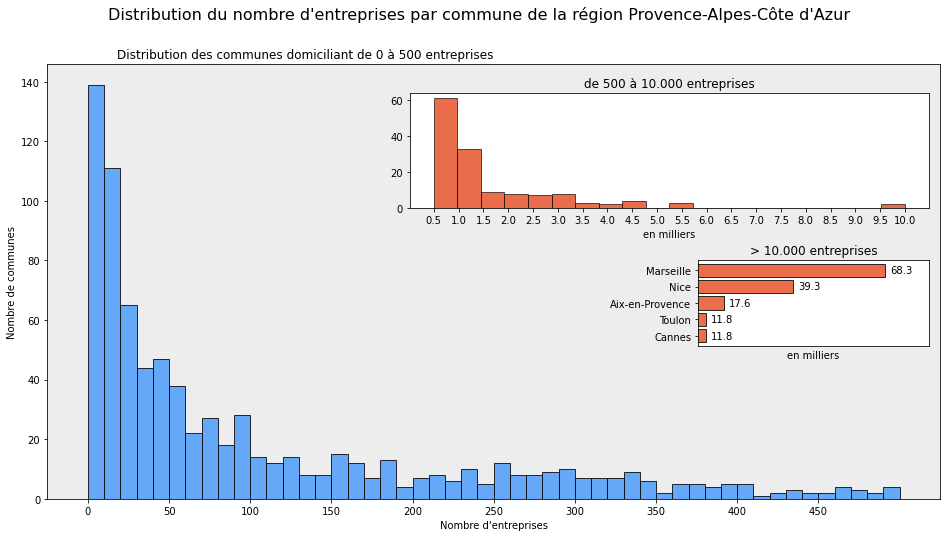

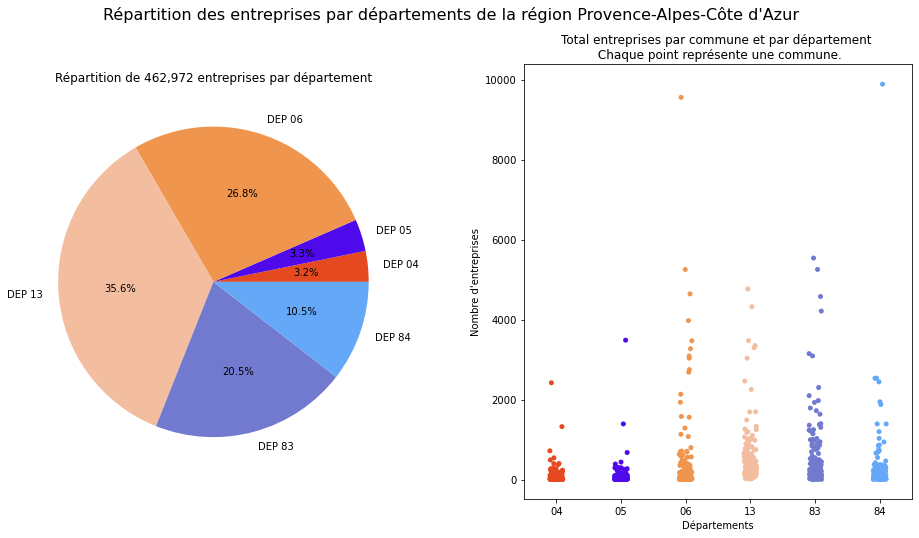

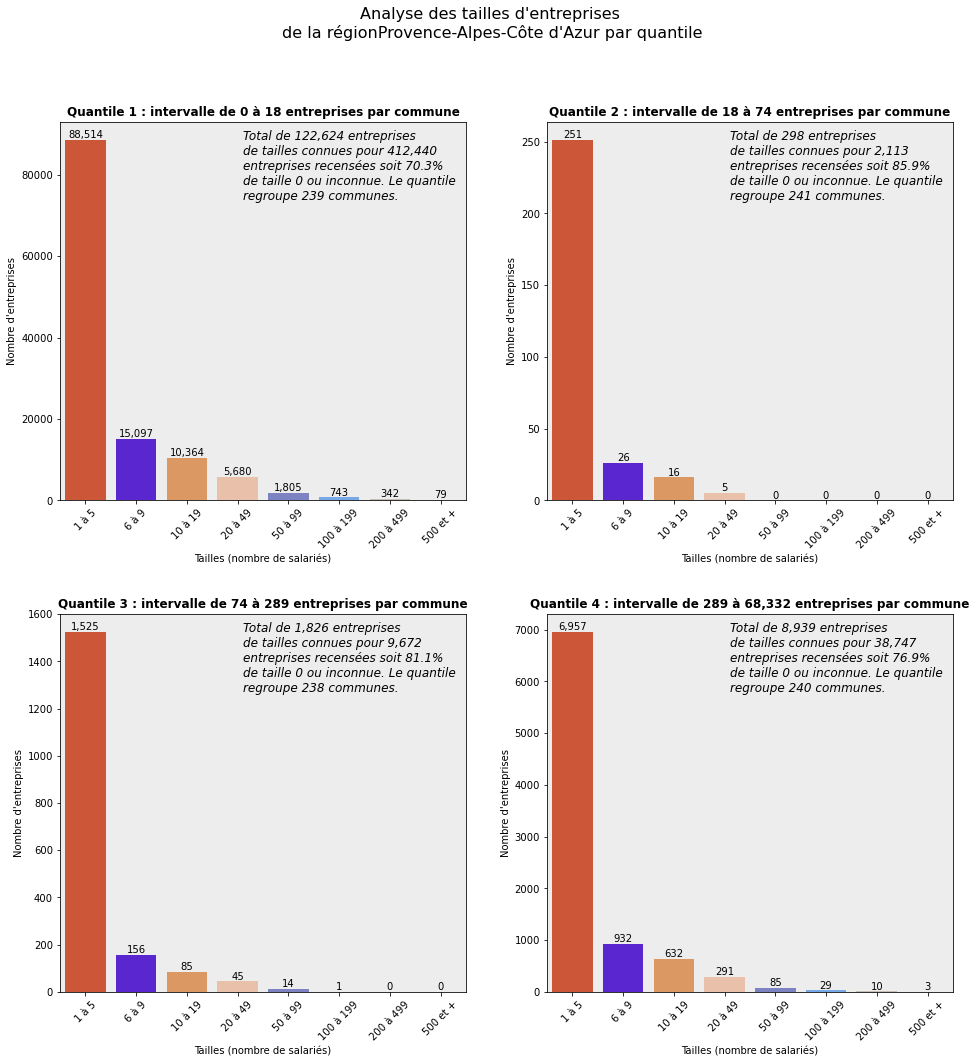

In [104]:
#Choisir le numéro de région
region_num = 93

#Appel de la fonction
region_name = reg_dict[region_num]
ets_region(region_num, region_name)
